# Simple Neural Network Model

Input: single principal component based on all 15 indicators 

Output: optimal max-shape portfolio with tight restrictions for the next period

In [1]:
import os
os.chdir(os.path.expanduser('../data'))

from dotenv import load_dotenv
load_dotenv()

from DataProvider import DataProvider

In [2]:
data_provider = DataProvider()
x = data_provider.get_formatted_features()
y = data_provider.get_formatted_targets()
x_train, y_train, x_val, y_val, x_test, y_test = data_provider.train_train_split(x, y)

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\cvxpy\problems\problem.py:1403: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


## Simple Dense Neural Network Model

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, Dropout, GRU, LSTM, Bidirectional
from keras.regularizers import L2

from helper_functions import train_and_evaluate_model

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 162)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         2,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,067 (11.98 KB)

 Trainable params: 3,067 (11.98 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.8408 - val_loss: 2.6006 - learning_rate: 0.0010
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.5267 - val_loss: 2.3071 - learning_rate: 0.0010
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2397 - val_loss: 2.0408 - learning_rate: 0.0010
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.9801 - val_loss: 1.8010 - learning_rate: 0.0010
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7463 - val_loss: 1.5861 - learning_rate: 0.0010
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5370 - val_loss: 1.3944 - learning_rate: 0.0010
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3507 - val_loss: 1.2238 - learning_rate: 0.0010
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1848 - val_loss: 1.0723 - learning_rate: 0.0010
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0376 - val_loss: 0.9381 - learning_rate: 0.0010
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━

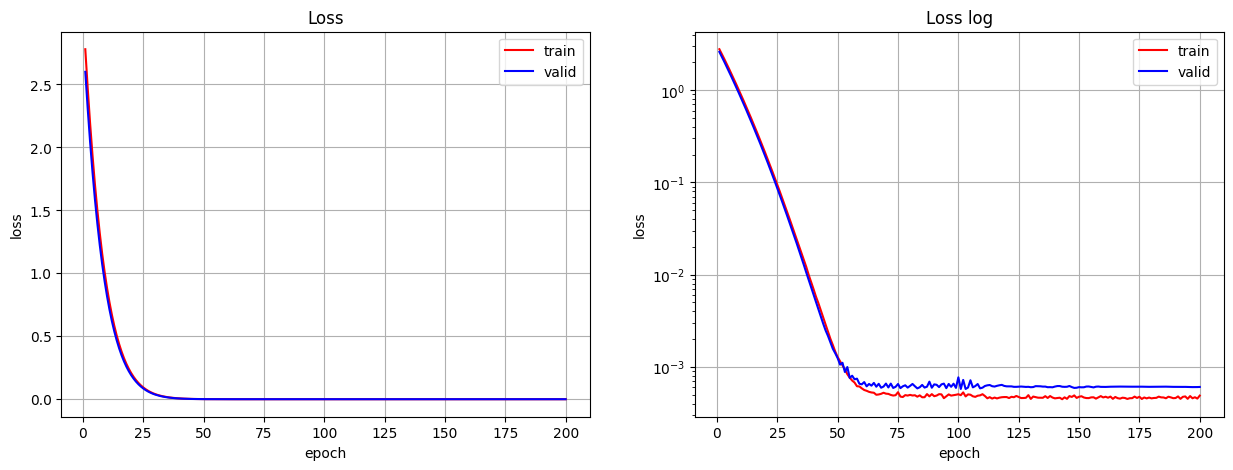

In [4]:
model_dnn = Sequential((
    Flatten(input_shape=x_train.shape[1:]),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_dnn, x_train, y_train,
                         x_val, y_val, x_test, y_test)

In [5]:
predictions = model_dnn.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [6]:
predictions[0].round(3)

array([0.471, 0.081, 0.086, 0.031, 0.03 , 0.032, 0.028, 0.022, 0.01 ,
       0.009, 0.016, 0.012, 0.013, 0.009, 0.017, 0.012, 0.012, 0.01 ,
       0.014, 0.011, 0.011, 0.011, 0.01 , 0.012, 0.01 , 0.011, 0.009],
      dtype=float32)

In [7]:
y_test[0]

array([0.576, 0.046, 0.075, 0.023, 0.02 , 0.039, 0.017, 0.016, 0.007,
       0.008, 0.02 , 0.005, 0.02 , 0.02 , 0.004, 0.002, 0.002, 0.002,
       0.024, 0.025, 0.02 , 0.012, 0.006, 0.003, 0.004, 0.002, 0.002])

## Convolutional Neural Network Model

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 4, 32)          │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │         2,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,147 (20.11 KB)

 Trainable params: 5,147 (20.11 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 8.5202 - val_loss: 7.8700 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6722 - val_loss: 7.0736 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.8916 - val_loss: 6.3428 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 6.1759 - val_loss: 5.6761 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.5239 - val_loss: 5.0699 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.9328 - val_loss: 4.5217 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.3997 - val_loss: 4.0282 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.9186 - val_loss: 3.5846 - learning_rate: 0.0010
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3.4855 - val_loss: 3.1857 - learning_rate: 0.0010
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━

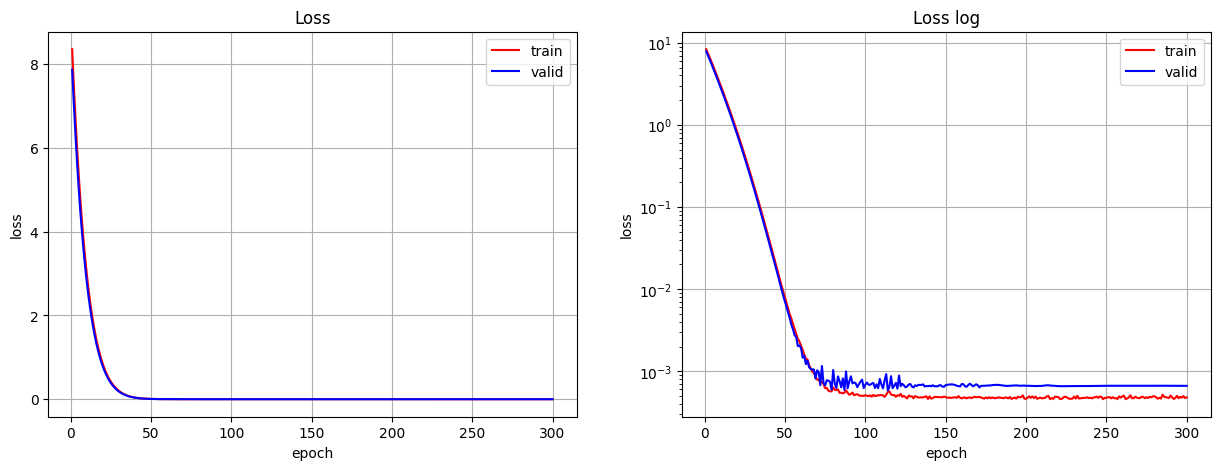

In [20]:
model_cnn = Sequential((
    Conv1D(32, 3, input_shape=x_train.shape[1:]),
    Flatten(),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=L2(0.3)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_cnn, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=300)

## Model with GRU

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_3 (GRU)                     │ (None, 32)             │         5,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,843 (26.73 KB)

 Trainable params: 6,843 (26.73 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 2.0654 - val_loss: 1.9737 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9426 - val_loss: 1.8554 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8255 - val_loss: 1.7426 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.7140 - val_loss: 1.6354 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.6085 - val_loss: 1.5339 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.5087 - val_loss: 1.4380 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4140 - val_loss: 1.3475 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.3251 - val_loss: 1.2622 - learning_rate: 0.0010
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.2415 - val_loss: 1.1820 - learning_rate: 0.0010
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━

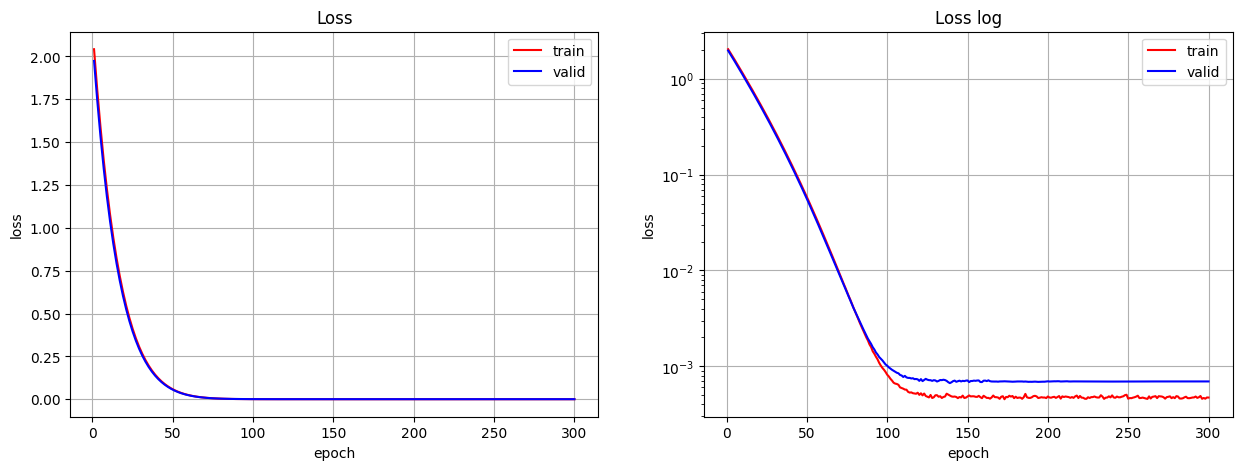

In [21]:
dropout = 0.1

model_gru = Sequential((
    GRU(32, input_shape=x_train.shape[1:],
         dropout=dropout, recurrent_dropout=dropout),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_gru, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=300)

## Model with LSTM

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         7,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,667 (33.86 KB)

 Trainable params: 8,667 (33.86 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 2.0587 - val_loss: 1.9683 - learning_rate: 0.0010
Epoch 2/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.9378 - val_loss: 1.8517 - learning_rate: 0.0010
Epoch 3/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.8226 - val_loss: 1.7406 - learning_rate: 0.0010
Epoch 4/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7128 - val_loss: 1.6350 - learning_rate: 0.0010
Epoch 5/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6084 - val_loss: 1.5343 - learning_rate: 0.0010
Epoch 6/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.5096 - val_loss: 1.4391 - learning_rate: 0.0010
Epoch 7/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.4161 - val_loss: 1.3492 - learning_rate: 0.0010
Epoch 8/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3278 - val_loss: 1.2644 - learning_rate: 0.0010
Epoch 9/300
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2449 - val_loss: 1.1846 - learning_rate: 0.0010
Epoch 10/300
7/7 ━━━━━━━━━━━━━━━━━━

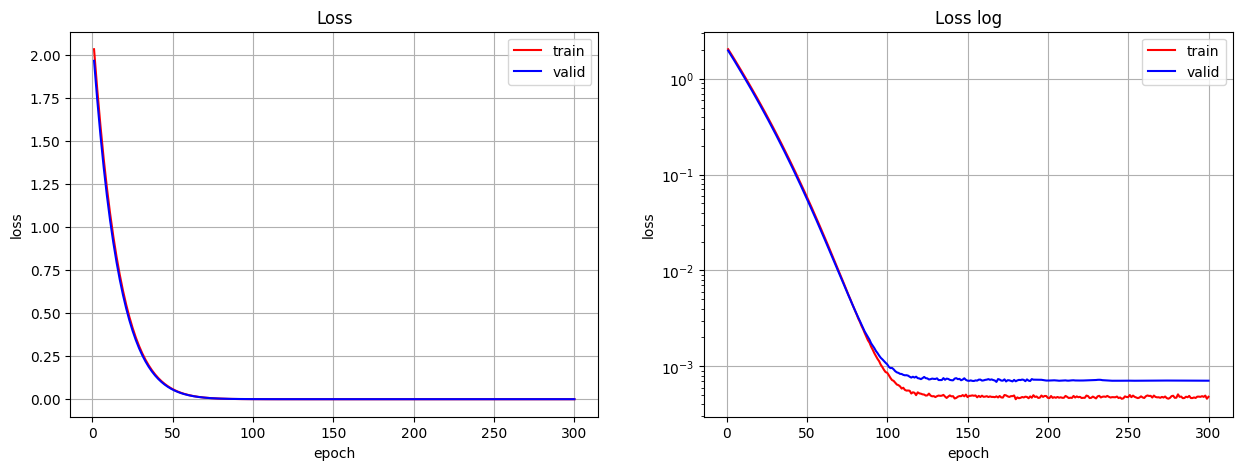

In [22]:
dropout = 0.1

model_lstm = Sequential((
    LSTM(32, input_shape=x_train.shape[1:],
         dropout=dropout, recurrent_dropout=dropout),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_lstm, x_train, y_train,
                         x_val, y_val, x_test, y_test, 
                         epochs=300)

## Model Bidireccional

c:\Users\lukas\Documents\Master mAI-X\TFM\venv\Lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 6, 32)          │         4,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │         3,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 27)             │           459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,867 (30.73 KB)

 Trainable params: 7,867 (30.73 KB)

 Non-trainable params: 0 (0.00 B)


Epoch 1/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 2.8716 - val_loss: 2.6100 - learning_rate: 0.0010
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.5304 - val_loss: 2.2924 - learning_rate: 0.0010
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2208 - val_loss: 2.0064 - learning_rate: 0.0010
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.9426 - val_loss: 1.7506 - learning_rate: 0.0010
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.6947 - val_loss: 1.5231 - learning_rate: 0.0010
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4744 - val_loss: 1.3223 - learning_rate: 0.0010
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.2801 - val_loss: 1.1465 - learning_rate: 0.0010
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1093 - val_loss: 0.9922 - learning_rate: 0.0010
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.9596 - val_loss: 0.8570 - learning_rate: 0.0010
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━

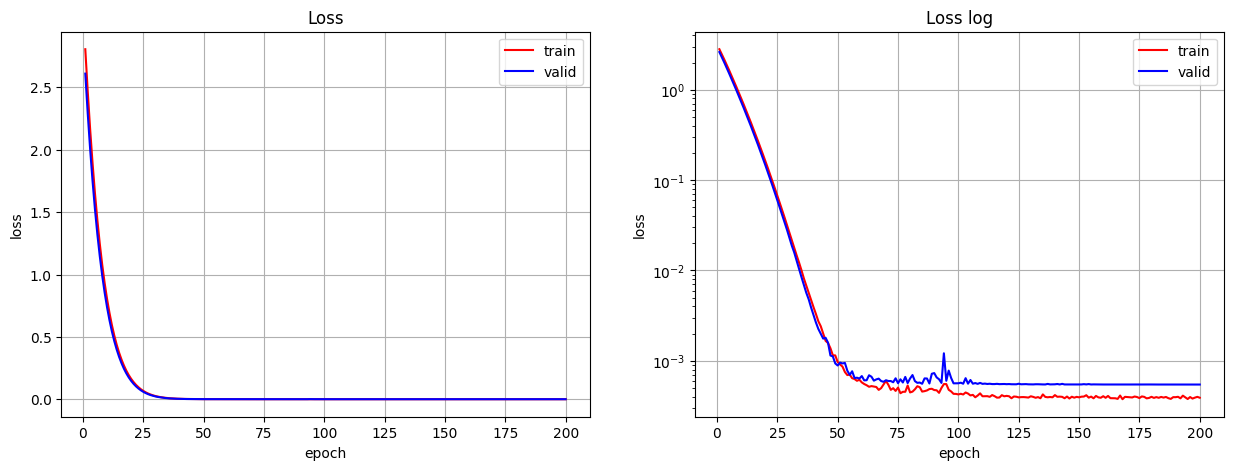

In [23]:
forward_layer = GRU(16, return_sequences=True)
backward_layer = GRU(16, activation='relu',
                     return_sequences=True,
                     go_backwards=True)

model_bidirectional = Sequential((
    Bidirectional(layer=forward_layer,
                  backward_layer=backward_layer,
                  input_shape=x_train.shape[1:]),
    Flatten(),
    Dense(16, activation='relu', kernel_regularizer=L2(0.1)),
    Dense(y_train.shape[1], activation='softmax')
))

train_and_evaluate_model(model_bidirectional, 
                         x_train, y_train,
                         x_val, y_val, x_test, y_test)

## Backtesting

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


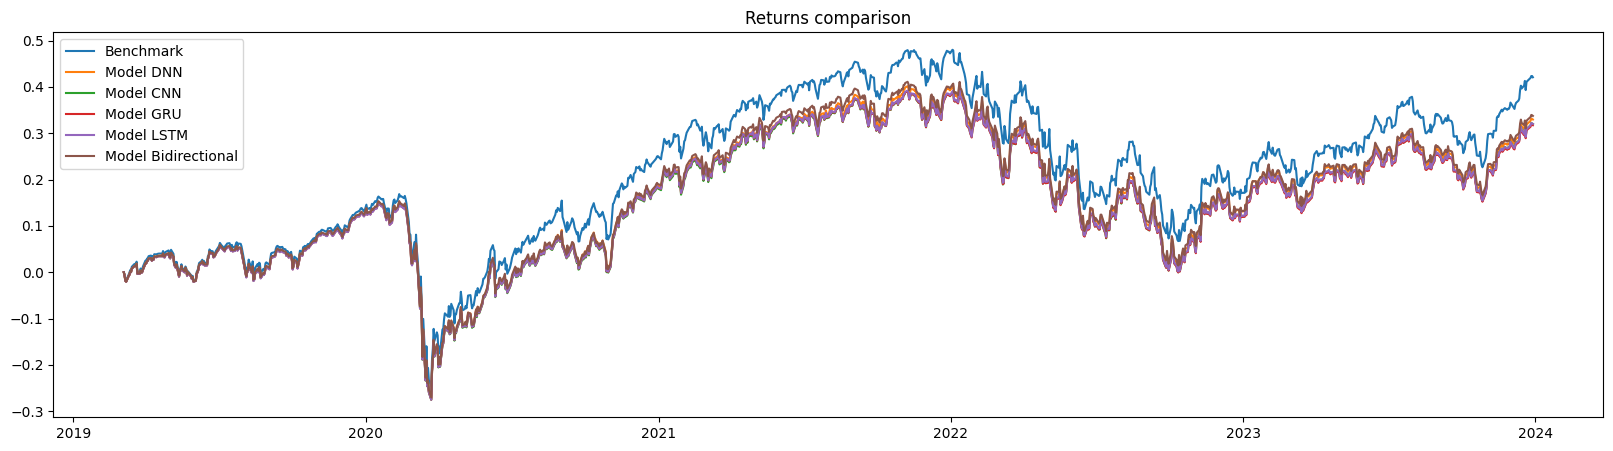

,Annual Returns,Annual Volatility,Sharpe Ratio,Sortino Ratio,Max Drawdown,Max Time Under Water,Calmar Ratio,Information Ratio
Benchmark,0.076754,0.203326,0.377494,0.442047,-0.354829,500.0,0.216313,0
Model DNN,0.06157,0.201727,0.305216,0.352825,-0.369029,493.0,0.166844,-0.56357
Model CNN,0.059968,0.202376,0.296322,0.341989,-0.370272,493.0,0.161958,-0.589058
Model GRU,0.059524,0.201646,0.295192,0.341364,-0.369347,493.0,0.161161,-0.620073
Model LSTM,0.060002,0.201638,0.297574,0.344032,-0.369184,493.0,0.162527,-0.606252
Model Bidirectional,0.062847,0.201951,0.311202,0.360985,-0.36749,538.0,0.171018,-0.514166


In [24]:
from helper_functions import run_full_backtesting

models = {
    'Model DNN': model_dnn,
    'Model CNN': model_cnn,
    'Model GRU': model_gru,
    'Model LSTM': model_lstm,
    'Model Bidirectional': model_bidirectional
}

df_results = run_full_backtesting(data_provider, x_test, models)
df_results